# Data augmentation
If you know CNNs, you'll be aware that they are scale or rotation invariant. This implies that when a CNN's weights are trained and optimised on a set of images, if that same CNN is used to classify those images, rotated, scaled, zoomed or in a different contrast, it'll likely misclassify it. 

In [1]:
# Import necessary packages.
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models

# Important constants
IMAGE_SIZE = 256
BATCH_SIZE = 32

Tensorflow has a fantastic data pipeline which can be used to load a dataset, and perform all sort of transformation on said dataset. 

In [2]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    r"C:\Users\ifunanyaScript\Everything\BrainTumour_DiagnosisApp\data\clean_dataset",
    shuffle = True,
    image_size = (IMAGE_SIZE, IMAGE_SIZE),
    batch_size = (BATCH_SIZE),
)

Found 3000 files belonging to 2 classes.


The above api scans the directory path passed as an argument.  
Then, stores the sub directory(s) names as classes/labels and all the corresponding files as images belonging to their respective classes.

In [3]:
label_names = dataset.class_names
label_names

['no_tumour', 'tumour']

When the dataset is loaded, it is batched into sizes as specified by the __"batch_size"__ parameter. In this case, 3000 images batched into sizes of 32, should be around 94 batches and that would be the length of the dataset.

In [4]:
len(dataset)

94

Viewing samples of this dataset can be done by iterating over batches. We can plot the samples in one batch as follows;

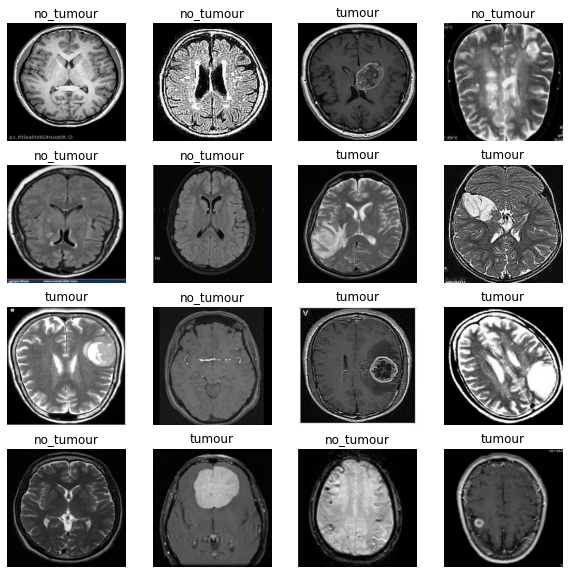

In [5]:
# Increase the size of the plot for better display.
plt.figure(figsize=(10, 10))

# Use .take(_) to get one batch from the entire dataset.
# Each batch contains a batch of images and a batch of labels in accordance to each other.
for image_batch, label_batch in dataset.take(1):
    # Plot the first 16 images in this batch.
    for i in range(16):
        plt.subplot(4, 4, i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(label_names[label_batch[i]])
        plt.axis("off")

There is randomness in the samples as a result of the __"shuffle"__ parameter specified.

Defining paramters for data augmentation is dependent on the type of images one is trying to classify. In the case of Brain MRI scans, these kind of images could come in a varying contrast, varying perspective and sometimes varying rotation. Hence, it is smart to base the type of augmentation on these muddles.

In [6]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomContrast(0.6),
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.3)
])

When utilizing a CNN model, one could also want to classify an image that isn't of the dimension of the images in the training dataset. _i.e_ The images in the training dataset are of dimension (256, 256), so the CNN is accustomed to this dimension, now it will have a problem with another image that is of a varying dimension like (125, 345).  
Hence, a resize and rescale layer should be added to the model, so that any image coming in with a varying dimesion is addressed before the model classifies it.

In [7]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

A few of the variables in this notebook will be used in the next notebook... __Model building.__

In [8]:
# ifunanyaScript